<a href="https://colab.research.google.com/github/rahiakela/introduction-to-time-series-forecasting-with-python/blob/part-1-data-preparation/3_time_series_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

Time series lends itself naturally to visualization. Line plots of observations over time are popular, but there is a suite of other plots that you can use to learn more about your problem. The more you learn about your data, the more likely you are to develop a better forecasting
model. 

We will discover 6 different types of plots that you can use to visualize
time series data with Python.

## Time Series Visualization

Visualization plays an important role in time series analysis and forecasting. Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality that can influence the choice of model. A problem is that many novices in the
field of time series forecasting stop with line plots. 

We will take a look at 6 different types of visualizations that you can use on your own time series data. They are:

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.

The focus is on univariate time series, but the techniques are just as applicable to multivariate time series, when you have more than one observation at each time step.

## Minimum Daily Temperatures Dataset

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia. The units are in degrees Celsius and there are 3650 observations. 

In [5]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame

series = pd.read_csv('daily-minimum-temperatures-in-me.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

## Line Plot

The first, and perhaps most popular, visualization for time series is the line plot. In this plot, time is shown on the x-axis with observation values along the y-axis.

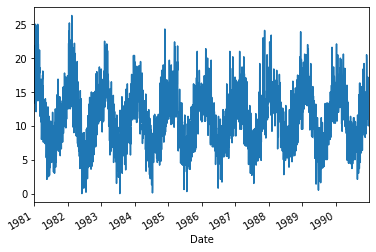

In [6]:
import matplotlib.pyplot as plt

series.astype(float).plot()
plt.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

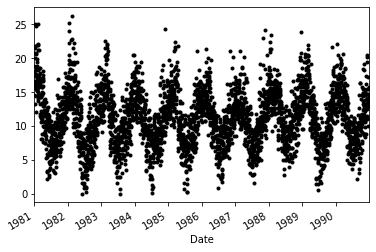

In [7]:
# changing the style of the line to be black dots
series.astype(float).plot(style='k.')
plt.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison.

In [9]:
# grouped by year
groups = series.groupby(pd.TimeGrouper('A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

AttributeError: ignored

## Histogram and Density Plots